<a href="https://colab.research.google.com/github/shreya024/ML-Web-App/blob/main/ML_Web_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
train=pd.read_csv('https://raw.githubusercontent.com/wlifferth/build-an-ml-web-app/main/train.csv',index_col='id')
train.head()

,zipcode,city,state,dateSold,bathrooms,bedrooms,livingArea,homeType,homeStatus,lotArea,lotUnit,address,price
id,,,,,,,,,,,,,
20479,76247.0,Justin,TX,1.641456e+12,3.0,4.0,3078.0,SINGLE_FAMILY,RECENTLY_SOLD,7492.32,sqft,"1937 Caddo Springs Dr, Justin, TX 76247",358100.0
13019,6070.0,Simsbury,CT,1.641283e+12,3.0,3.0,2200.0,CONDO,PENDING,0.00,sqft,"18 Brettonwood Dr, Simsbury, CT 06070",399900.0
9816,85340.0,Litchfield Park,AZ,1.641370e+12,5.0,5.0,3722.0,SINGLE_FAMILY,RECENTLY_SOLD,6577.56,sqft,"14584 W Hidden Terrace Loop, Litchfield Park, ...",660000.0
4479,99507.0,Anchorage,AK,1.641370e+12,2.0,3.0,1388.0,CONDO,RECENTLY_SOLD,0.00,sqft,"2903 Suncatcher Ct, Anchorage, AK 99507",232500.0
180,3901.0,Berwick,ME,1.640905e+12,4.0,3.0,2972.0,SINGLE_FAMILY,RECENTLY_SOLD,1.83,acres,"32 Tyler Ln, Berwick, ME 03901",551900.0


In [4]:
train.columns

Index(['zipcode', 'city', 'state', 'dateSold', 'bathrooms', 'bedrooms',
       'livingArea', 'homeType', 'homeStatus', 'lotArea', 'lotUnit', 'address',
       'price'],
      dtype='object')

In [5]:
for column in train.columns:
  print(column)
  # 5 most common values for each column
  print(train[column].value_counts().nlargest(5))
  print()

zipcode
82001.0    103
82009.0     68
99504.0     62
99577.0     60
83709.0     56
Name: zipcode, dtype: int64

city
Anchorage       318
Louisville      224
Cheyenne        205
Las Vegas       199
Indianapolis    198
Name: city, dtype: int64

state
CT    938
IN    885
GA    862
DE    845
IA    832
Name: state, dtype: int64

dateSold
1.640851e+12    4724
1.641542e+12    3566
1.641456e+12    2444
1.641370e+12    1870
1.640765e+12    1735
Name: dateSold, dtype: int64

bathrooms
2.0    10563
3.0     6628
1.0     4018
4.0     1643
5.0      294
Name: bathrooms, dtype: int64

bedrooms
3.0    11286
4.0     5751
2.0     4161
5.0     1309
1.0      630
Name: bedrooms, dtype: int64

livingArea
1200.000000    150
1954.681419    117
1800.000000    107
960.000000      96
1400.000000     95
Name: livingArea, dtype: int64

homeType
SINGLE_FAMILY    19067
CONDO             2117
TOWNHOUSE         1922
MULTI_FAMILY       528
Name: homeType, dtype: int64

homeStatus
RECENTLY_SOLD    23148
PENDING          

In [6]:
len(train)

23634

In [7]:
# Fetching a copy of data of homes that are only 'Recently_Sold'
train_only_sold=train[train['homeStatus']=='RECENTLY_SOLD'].copy()
train_only_sold.head()

,zipcode,city,state,dateSold,bathrooms,bedrooms,livingArea,homeType,homeStatus,lotArea,lotUnit,address,price
id,,,,,,,,,,,,,
20479,76247.0,Justin,TX,1.641456e+12,3.0,4.0,3078.0,SINGLE_FAMILY,RECENTLY_SOLD,7492.32,sqft,"1937 Caddo Springs Dr, Justin, TX 76247",358100.0
9816,85340.0,Litchfield Park,AZ,1.641370e+12,5.0,5.0,3722.0,SINGLE_FAMILY,RECENTLY_SOLD,6577.56,sqft,"14584 W Hidden Terrace Loop, Litchfield Park, ...",660000.0
4479,99507.0,Anchorage,AK,1.641370e+12,2.0,3.0,1388.0,CONDO,RECENTLY_SOLD,0.00,sqft,"2903 Suncatcher Ct, Anchorage, AK 99507",232500.0
180,3901.0,Berwick,ME,1.640905e+12,4.0,3.0,2972.0,SINGLE_FAMILY,RECENTLY_SOLD,1.83,acres,"32 Tyler Ln, Berwick, ME 03901",551900.0
21279,80241.0,Thornton,CO,1.640851e+12,3.0,2.0,1926.0,TOWNHOUSE,RECENTLY_SOLD,0.00,sqft,"1284 E 130th Ave UNIT A, Thornton, CO 80241",435000.0


In [8]:
# Getting rid of unnecessary columns
train_only_sold.drop(['homeStatus','address','dateSold'],inplace=True,axis=1)

In [9]:
train_only_sold.head()

,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,lotUnit,price
id,,,,,,,,,,
20479,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,sqft,358100.0
9816,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,sqft,660000.0
4479,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,sqft,232500.0
180,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,1.83,acres,551900.0
21279,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,sqft,435000.0


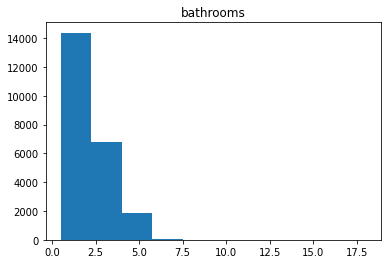

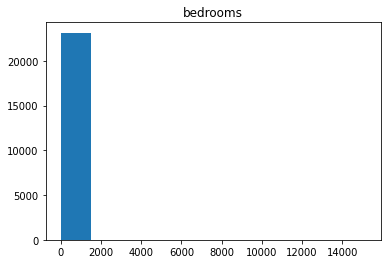

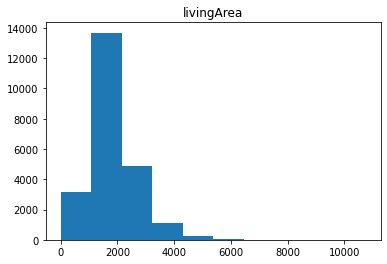

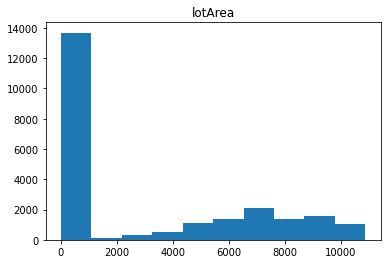

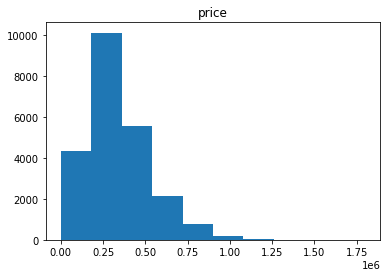

In [10]:
# Converting Non-numerical(Categorical) Columns into numerical ones
numerical_columns=['bathrooms','bedrooms','livingArea','lotArea','price']
for column in numerical_columns:
  plt.title(column)
  plt.hist(train_only_sold[column])
  plt.show()

In [11]:
# Converting lotArea acres to sqft
square_feet_in_acre=43560

def convert_lot_area(row):
  if row['lotUnit']=='acre':
    return row['lotArea']*square_feet_in_acre
  else:
    return row['lotArea']

train_only_sold['lotArea']=train_only_sold.apply(convert_lot_area,axis=1)
train_only_sold.head()

,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,lotUnit,price
id,,,,,,,,,,
20479,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,sqft,358100.0
9816,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,sqft,660000.0
4479,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,sqft,232500.0
180,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,1.83,acres,551900.0
21279,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,sqft,435000.0


In [12]:
train_only_sold.drop('lotUnit',inplace=True,axis=1)
train_only_sold.head()

,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,price
id,,,,,,,,,
20479,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,358100.0
9816,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,660000.0
4479,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,232500.0
180,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,1.83,551900.0
21279,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,435000.0


In [17]:
# Removing Outliers
# We call it an outlier if the value is more than 3 standard deviations away from the mean
bedroom_mean=train_only_sold['bedrooms'].mean()
bedroom_std=train_only_sold['bedrooms'].std()


In [21]:
bedroom_std_x_3=bedroom_std*3
print(bedroom_std_x_3)

298.7398864510935


In [22]:
train_no_outliers=train_only_sold[np.abs(train_only_sold['bedrooms']-bedroom_mean)<bedroom_std_x_3].copy()
train_no_outliers.head()

,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,price
id,,,,,,,,,
20479,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,358100.0
9816,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,660000.0
4479,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,232500.0
180,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,1.83,551900.0
21279,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,435000.0


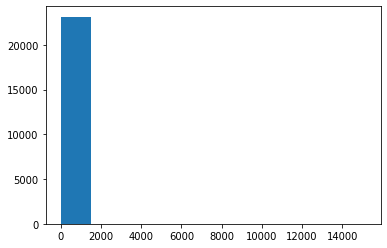

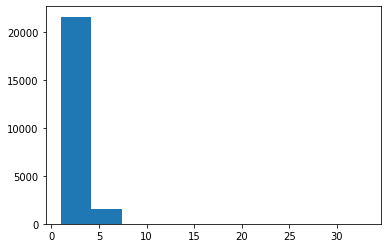

In [23]:
# See the difference
plt.hist(train_only_sold['bedrooms'])
plt.show()

plt.hist(train_no_outliers['bedrooms'])
plt.show()

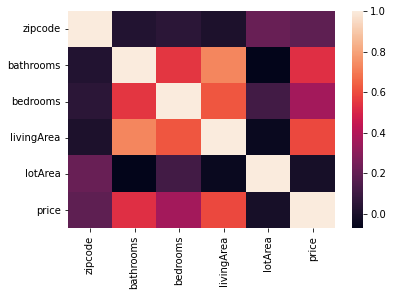

In [25]:
# Showing Co-relation
sns.heatmap(train_no_outliers.corr())

In [28]:
# Turning Categorical Variables into Numbers - One Hot Encoding
# Example
colors=pd.DataFrame({
    'color':['red','blue','green','red']
})
colors

,color
0,red
1,blue
2,green
3,red


In [31]:
# Convert the True and falses into binary ---One Hot Encoding - at a time only one column will be hot
pd.get_dummies(colors,columns=['color'])

,color_blue,color_green,color_red
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1


In [34]:
# Turing Categorical Variables into Binary One Hot Encoded Columns using get_dummies from pandas
# One Hot Encoding is only useful for columns having not too many distinct values
train_home_type_encoded=pd.get_dummies(train_no_outliers,columns=['homeType'])

In [33]:
len(train_no_outliers['zipcode'].unique())
# One Hot Encoding is not possible for this

7301

In [36]:
# Median Income
median_income_by_zipcode=pd.read_csv('https://raw.githubusercontent.com/wlifferth/build-an-ml-web-app/main/median_income_by_zip_code.csv')
median_income_by_zipcode.head()

,median_income,zip_code
0,9419,601
1,9963,602
2,10520,603
3,10272,606
4,12352,610


In [37]:
# Merging datasets to replace zipcode by median income
merged_df=pd.merge(train_no_outliers,median_income_by_zipcode,how='left',left_on='zipcode',right_on='zip_code')
merged_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1117: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,price,median_income,zip_code
0,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,358100.0,46658.0,76247.0
1,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,660000.0,57188.0,85340.0
2,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,232500.0,66044.0,99507.0
3,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,1.83,551900.0,46016.0,3901.0
4,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,435000.0,65217.0,80241.0


In [38]:
merged_df=merged_df.drop(['zipcode','zip_code'],axis=1).copy()

In [39]:
merged_df

,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,price,median_income
0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,358100.0,46658.0
1,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,660000.0,57188.0
2,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,232500.0,66044.0
3,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,1.83,551900.0,46016.0
4,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,435000.0,65217.0
...,...,...,...,...,...,...,...,...,...
23142,Macon,GA,2.0,3.0,2428.0,SINGLE_FAMILY,7840.80,175000.0,21375.0
23143,Providence,RI,2.0,3.0,1600.0,SINGLE_FAMILY,3600.00,305000.0,33125.0
23144,Glendale,AZ,2.0,3.0,1605.0,SINGLE_FAMILY,6150.00,305000.0,30005.0
23145,Maricopa,AZ,2.0,2.0,1810.0,SINGLE_FAMILY,8713.00,360000.0,50044.0


In [40]:
train_home_type_encoded=pd.get_dummies(merged_df,columns=['homeType'])

In [41]:
train_home_type_encoded

,city,state,bathrooms,bedrooms,livingArea,lotArea,price,median_income,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE
0,Justin,TX,3.0,4.0,3078.0,7492.32,358100.0,46658.0,0,0,1,0
1,Litchfield Park,AZ,5.0,5.0,3722.0,6577.56,660000.0,57188.0,0,0,1,0
2,Anchorage,AK,2.0,3.0,1388.0,0.00,232500.0,66044.0,1,0,0,0
3,Berwick,ME,4.0,3.0,2972.0,1.83,551900.0,46016.0,0,0,1,0
4,Thornton,CO,3.0,2.0,1926.0,0.00,435000.0,65217.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23142,Macon,GA,2.0,3.0,2428.0,7840.80,175000.0,21375.0,0,0,1,0
23143,Providence,RI,2.0,3.0,1600.0,3600.00,305000.0,33125.0,0,0,1,0
23144,Glendale,AZ,2.0,3.0,1605.0,6150.00,305000.0,30005.0,0,0,1,0
23145,Maricopa,AZ,2.0,2.0,1810.0,8713.00,360000.0,50044.0,0,0,1,0
